In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter

import semd_utils

In [2]:
events = np.loadtxt("../../data_processed/events_refact.txt")
# this data is already filtered by time, no need to redo it here

In [3]:
# use only the specified patch of input events
patch_center = (90, 120)
patch_size = 180
events = semd_utils.filter_patch(events, patch_center, patch_size)

data_steps = 50 # timesteps to divide the data into
sim_steps = 50 # simulation steps
shape = (patch_size, patch_size)
t_start = events[0, 0]
duration = events[-1, 0] - events[0, 0]

In [29]:
args = {
    "shape":shape,
    "conv_shape": (3, 3),
    "conv_stride": (1, 1),
    "thresh_conv": 0.5,
    "detector_du": 0.1
}
data = semd_utils.run_sim(args, events, data_steps, sim_steps)

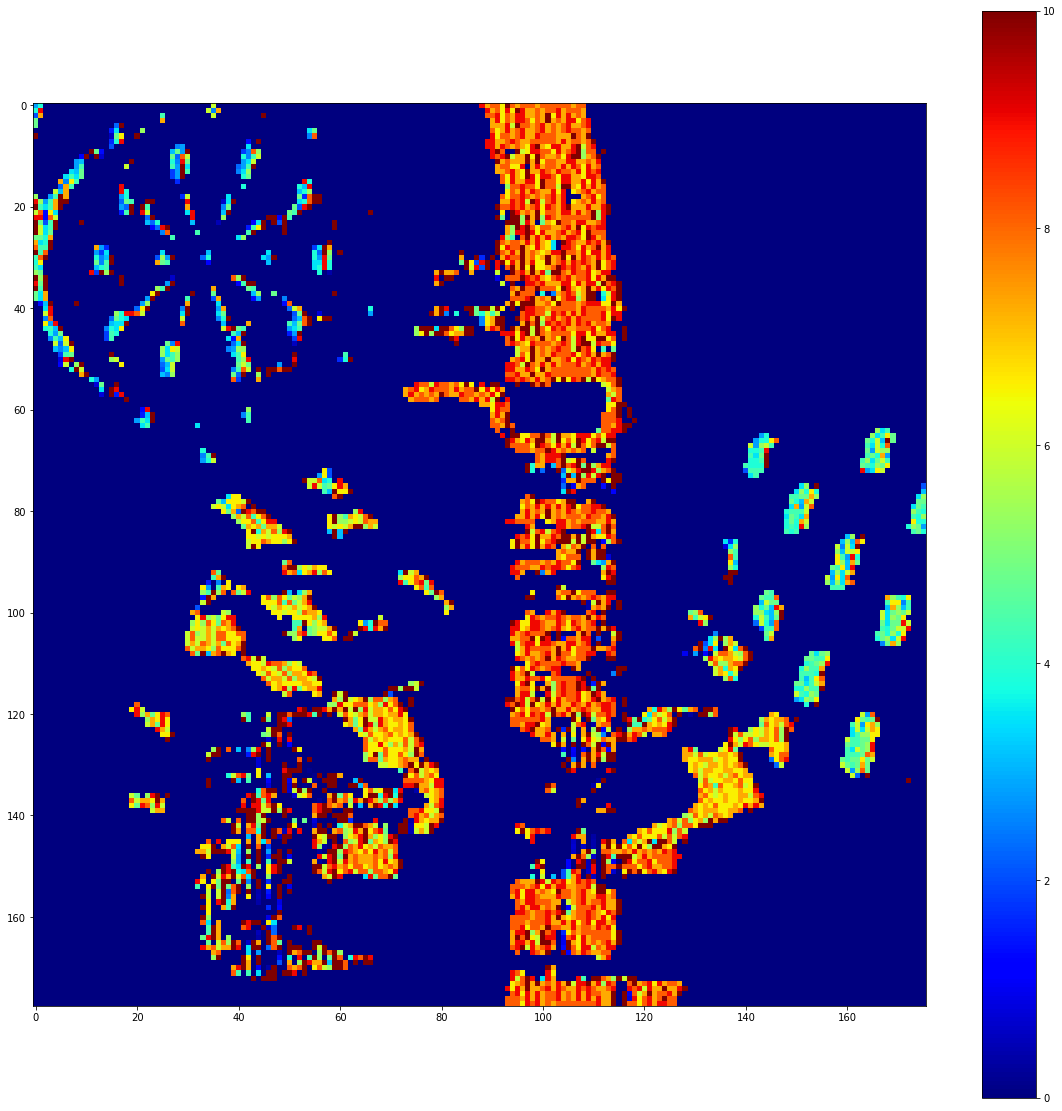

In [30]:
%matplotlib inline
plt.figure(figsize=(20, 20))
m = plt.imshow(np.delete(np.sum(data, axis=-1), 0, 1), cmap="jet")
plt.colorbar(m)

In [31]:
args = {
    "shape":shape,
    "conv_shape": (3, 3),
    "conv_stride": (1, 1),
    "thresh_conv": 0.6,
    "detector_du": 0.1
}
data = semd_utils.run_sim(args, events, data_steps, sim_steps)

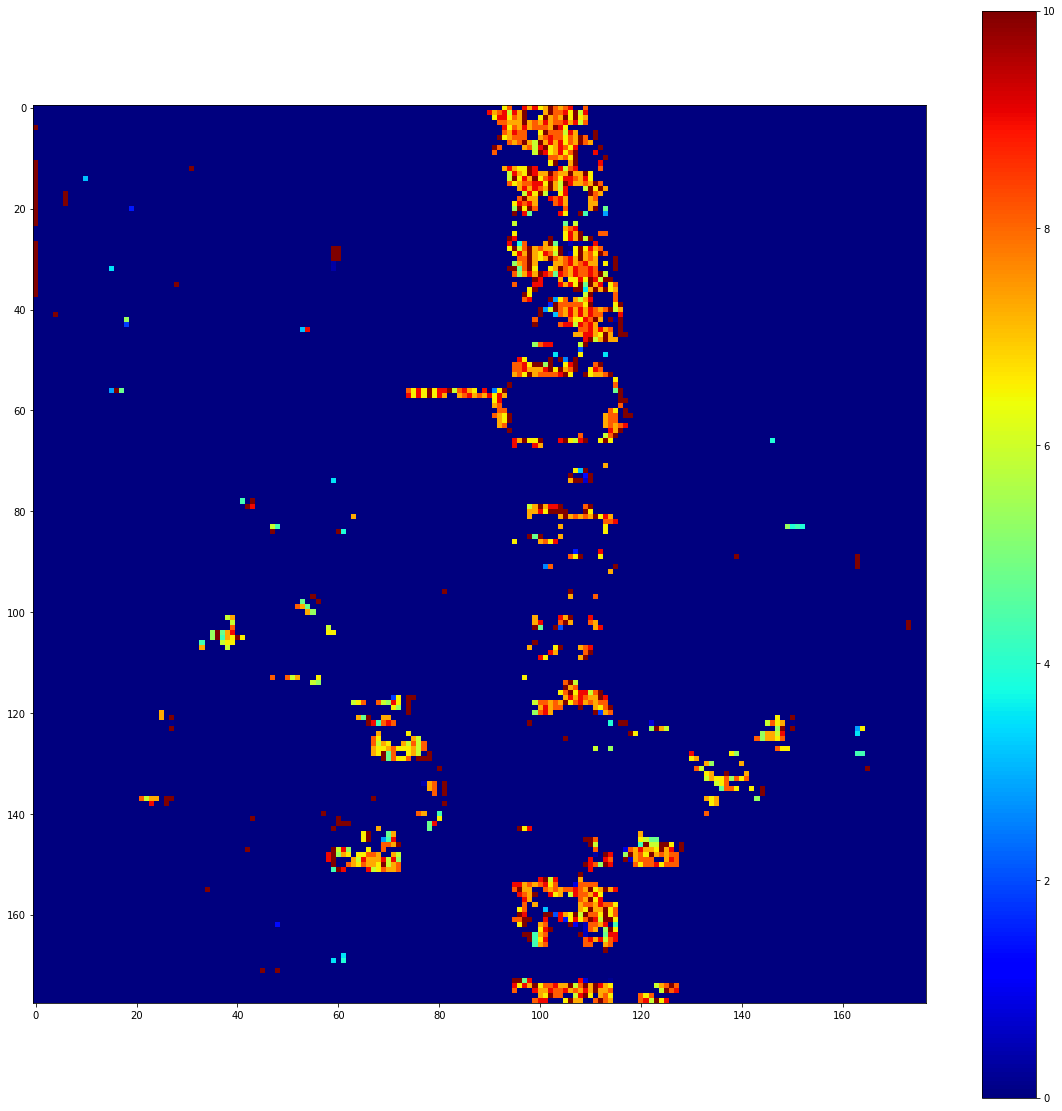

In [32]:
%matplotlib inline
plt.figure(figsize=(20, 20))
m = plt.imshow(np.sum(data, axis=-1), cmap="jet")
plt.colorbar(m)

In [33]:
args = {
    "shape":shape,
    "conv_shape": (5, 5),
    "conv_stride": (1, 1),
    "thresh_conv": 0.5,
    "detector_du": 0.1
}
data = semd_utils.run_sim(args, events, data_steps, sim_steps)

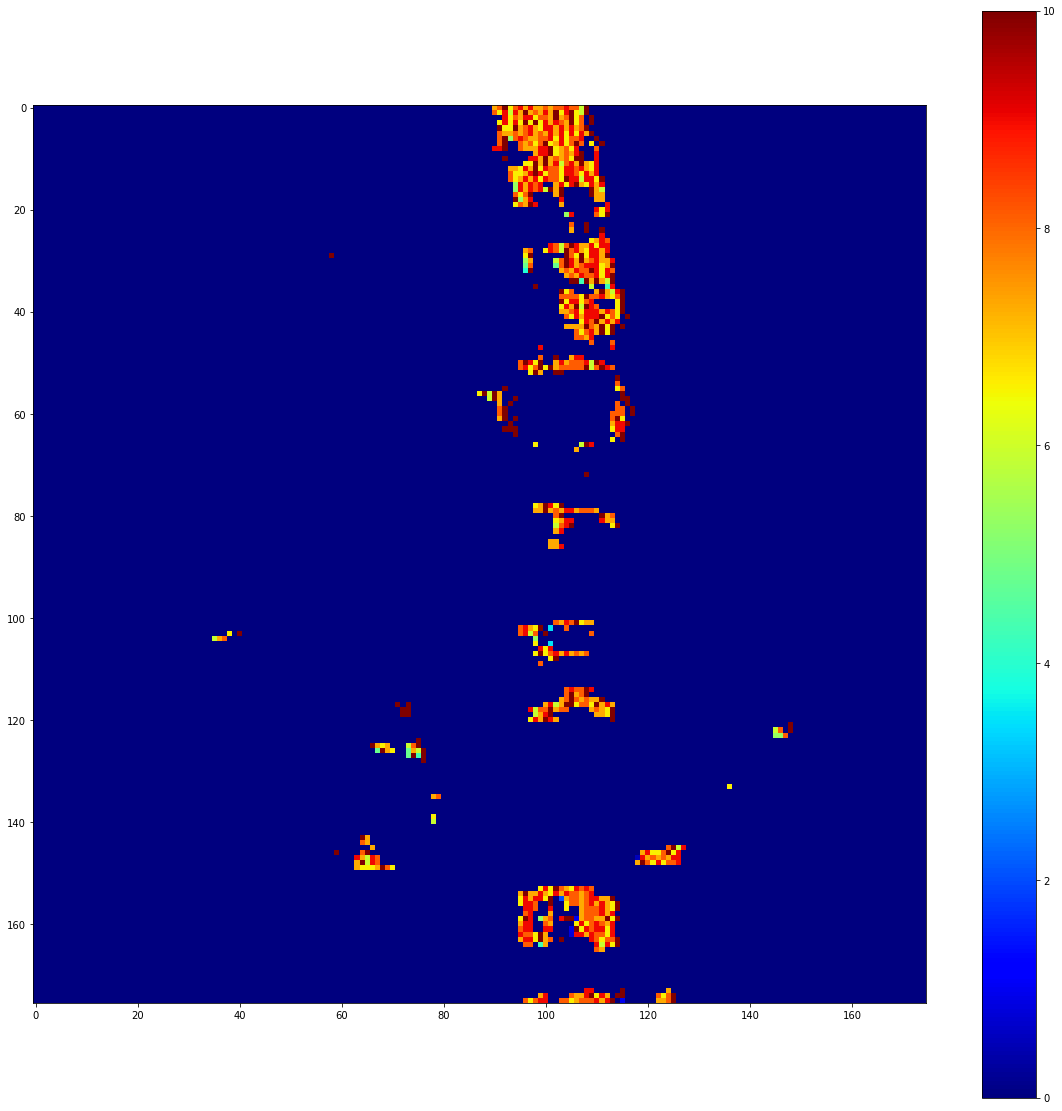

In [34]:
%matplotlib inline
plt.figure(figsize=(20, 20))
m = plt.imshow(np.sum(data, axis=-1), cmap="jet")
plt.colorbar(m)

In [19]:
np.save("semd_out_2x2x2_du1", data)

In [ ]:
%matplotlib notebook
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
img_data = data[:,:,0]
img = plt.imshow(img_data, cmap="jet", vmin=0, vmax=10)

def update(frame):
    img_data = data[:,:,frame]
    img.set_array(img_data)
    return [img]

ani = FuncAnimation(fig, update, frames=sim_steps, blit=True, interval=duration/100)

In [ ]:
ani.save("TLI_300.gif", dpi=300, writer=PillowWriter(fps=60))

In [ ]:
# ani.save("TLIa.mp4", writer=FFMpegWriter(fps=60))